In [1]:
#https://www.kaggle.com/saqlainhussainshah/cicids-2017-knn
#https://www.kaggle.com/jelenanikolicelfak/cicids-2017-klasifikatori
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
#loading data
df1 = pd.read_csv(r"E:\datasets\sdn\in sdn\InSDN_DatasetCSV\Normal_data.csv")
df2 = pd.read_csv(r"E:\datasets\sdn\in sdn\InSDN_DatasetCSV\OVS.csv")
df3 = pd.read_csv(r"E:\datasets\sdn\in sdn\InSDN_DatasetCSV\metasploitable-2.csv")

In [4]:
df=pd.concat([df1,df2,df3])

In [5]:
del df1,df2,df3

In [6]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,124937.0,1071.0,9100,0,2839.477273,1839.508257,517,0,26.775000,109.188026,513835.99070,342.535579,2954.578313,7953.221927,64066.0,-44.0,238564.0,5548.000000,10446.29576,64066.0,2.0,245230.0,6287.948718,12986.46879,79070.0,29.0,0,0,0,0,880,804,179.423398,163.112180,0,9100,1482.447059,1933.268313,3.737526e+06,0,1,0,0,1,0,0,0,0,1500.095238,2839.477273,26.775000,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,1071.0,439537.0,517,0,10.009346,67.496680,27300,0,2949.912752,3012.589539,274445.34210,159.456949,6295.878431,56408.330520,859760.0,-102.0,1332121.0,12567.179250,83434.14155,861138.0,2.0,1603130.0,10831.959460,73926.65245,861129.0,1.0,0,0,0,0,2140,3004,66.648022,92.808928,0,27300,1714.428016,2713.465917,7.362897e+06,0,1,0,0,0,0,0,0,1,1721.125000,10.009346,2949.912752,0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,66.0,758.0,66,0,13.200000,29.516097,638,0,151.600000,276.826299,15524.32269,188.401974,5897.555556,15184.845200,46232.0,19.0,50302.0,12575.500000,22521.87727,46251.0,67.0,52962.0,13240.500000,22052.04405,46258.0,405.0,0,0,0,0,100,124,94.200987,94.200987,0,638,74.909091,190.807471,3.640749e+04,0,1,0,0,0,0,0,0,1,82.400000,13.200000,151.600000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,0.0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,286.738351,6975.000000,0.000000,6975.0,6975.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,20,20,143.369176,143.369176,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,780.0,11085.0,427,0,60.000000,130.042942,2596,0,692.812500,794.157350,62401.06027,152.518394,6790.750000,12933.295910,38521.0,-54.0,86882.0,7240.166667,13050.84163,38805.0,1.0,190141.0,12676.066670,15949.09279,38521.0,1.0,0,0,0,0,260,344,68.370315,84.148080,0,2596,395.500000,661.691706,4.378359e+05,0,1,0,0,0,0,0,0,1,409.137931,60.000000,692.812500,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [7]:
df.groupby(' Label').first()

KeyError: ' Label'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343889 entries, 0 to 136742
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

In [9]:
len(df.columns)

84

In [10]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
df=df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=False)

KeyError: "[' Fwd Header Length.1'] not found in axis"

In [11]:
# drop nan and infinite rows
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

# drop duplicate rows
df =  df.drop_duplicates(keep="first")
df.reset_index(drop=True,inplace=True)

In [12]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
if(miss.sum()==0.0):
    print(miss)

else:
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)
    miss
    print('missing values are'.format(miss))

Flow ID      0.0
Src IP       0.0
Src Port     0.0
Dst IP       0.0
Dst Port     0.0
            ... 
Idle Mean    0.0
Idle Std     0.0
Idle Max     0.0
Idle Min     0.0
Label        0.0
Length: 84, dtype: float64


In [13]:
#visualising missing values
#df = pd.DataFrame()
#df.to_frame()
#miss = pd.DataFrame()
#miss.drop_duplicates()
if(miss.sum()==0.0):
    print("There is no missing values")
    print(miss.head())
else:    
    miss.to_frame()
    miss.columns = ['count']
    miss.index.names = ['Name']
    miss['Name'] = miss.index

#plot the missing value count
#if(miss.columns!=0):
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = ['count'], data=miss)
#sns.boxplot, 'species', 'value', x='species', y='value')
    plt.xticks(rotation = 90)
    sns.plt.show()

There is no missing values
Flow ID     0.0
Src IP      0.0
Src Port    0.0
Dst IP      0.0
Dst Port    0.0
dtype: float64


In [14]:
df.shape

(343889, 84)

In [15]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

['Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'PSH Flag Cnt', 'URG Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']


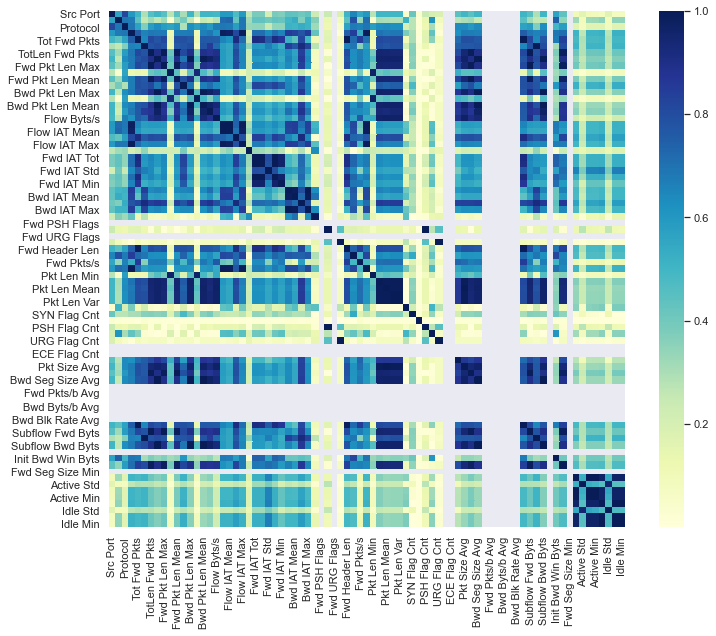

In [16]:
###############################################################################
#              6. Feature Selection: Removing highly correlated features      #
###############################################################################
# Filter Method: Spearman's Cross Correlation > 0.95
# Make correlation matrix
corr_matrix = df.corr(method = "spearman").abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print(to_drop)

# Drop features
df = df.drop(to_drop, axis = 1)

df.shape

print(to_drop)

In [17]:
df.shape

(343889, 48)

In [18]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

datetime.timedelta(seconds=10, microseconds=885206)

In [19]:
diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 0m 42s
